In [85]:
!pip install pymongo

In [86]:
from pymongo import MongoClient

In [87]:
# * VERY IMPORTANT TO CONFIG HERE
mongo_url = 'mongodb://localhost'
db_name = 'test'
collection_name = 'test_collection'
column_name = 'data'

client = MongoClient(mongo_url)
db=client[db_name]
collection = db[collection_name]

In [88]:
import pandas as pd
data = pd.DataFrame( list(collection.find({})))
data.head()

,_id,topic,partition,timestamp_kafka,timestamp_db,data,timestamp_producer,producer_id
0,61829da0b001a2c70fac28b6,test-topic,0,1635949984184,1.635950e+12,0.314683,1.635950e+12,parakafka
1,61829da3b001a2c70fac28b7,test-topic,0,1635949987187,1.635950e+12,0.240577,1.635950e+12,parakafka
2,61829da6b001a2c70fac28b8,test-topic,0,1635949990198,1.635950e+12,1.071590,1.635950e+12,parakafka
3,61829da9b001a2c70fac28b9,test-topic,0,1635949993208,1.635950e+12,-1.587981,1.635950e+12,parakafka
4,61829dacb001a2c70fac28ba,test-topic,0,1635949996222,1.635950e+12,-1.661553,1.635950e+12,parakafka


In [89]:
print('Current data count: ', data.shape[0])

Current data count:  246


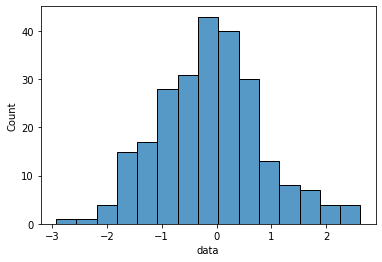

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=data, x=column_name)
plt.show()

# Throughput calculation TEST

In [91]:
time_data = data[['timestamp_kafka', 'timestamp_db', 'timestamp_producer']]
time_data.head()

,timestamp_kafka,timestamp_db,timestamp_producer
0,1635949984184,1.635950e+12,1.635950e+12
1,1635949987187,1.635950e+12,1.635950e+12
2,1635949990198,1.635950e+12,1.635950e+12
3,1635949993208,1.635950e+12,1.635950e+12
4,1635949996222,1.635950e+12,1.635950e+12


In [92]:
import numpy as np
time_data = time_data.astype(np.int64)
time_data.head()

,timestamp_kafka,timestamp_db,timestamp_producer
0,1635949984184,1635949984191,1635949984178
1,1635949987187,1635949987193,1635949987181
2,1635949990198,1635949990205,1635949990193
3,1635949993208,1635949993215,1635949993201
4,1635949996222,1635949996236,1635949996215


In [93]:
start_time = time_data.min().min()
print('start time: ', start_time)

start time:  1635949984178


In [94]:
time_data = time_data - start_time
time_data.head()

,timestamp_kafka,timestamp_db,timestamp_producer
0,6,13,0
1,3009,3015,3003
2,6020,6027,6015
3,9030,9037,9023
4,12044,12058,12037


In [95]:
end_time = time_data.max().max()
print('time from start to end of test: ', end_time, 'in minutes: ', end_time/1000/60)

time from start to end of test:  736947 in minutes:  12.28245


In [96]:
# through put: counting over intervals
interval = 10000 # 10 secs
start = 0
end = end_time
grouped_by_interval = time_data["timestamp_producer"]
grouped_by_interval = grouped_by_interval.groupby(pd.cut(grouped_by_interval, np.arange(start, end, interval))).count()
throughput = grouped_by_interval/(interval/1000)
throughput.describe()

count    73.000000
mean      0.331507
std       0.046776
min       0.300000
25%       0.300000
50%       0.300000
75%       0.400000
max       0.400000
Name: timestamp_producer, dtype: float64

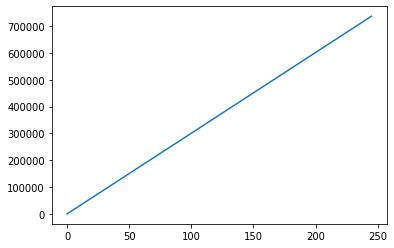

In [97]:
plt.plot(time_data["timestamp_producer"])